In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/Years_of_Experience_vs_Salary_Dataset (1).csv')

In [4]:
df.head()

,Years_of_Experience,Salary
0,15.0,33888.51
1,38.0,72323.28
2,29.3,63500.99
3,23.9,53852.93
4,6.2,18198.95


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years_of_Experience  1000 non-null   float64
 1   Salary               1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [6]:
import matplotlib.pyplot as plt

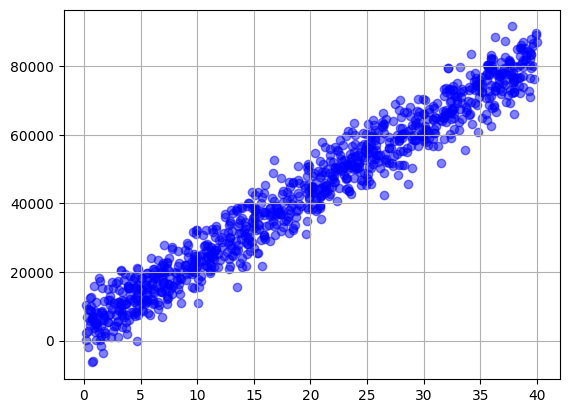

In [7]:
plt.scatter(df['Years_of_Experience'], df['Salary'], color='blue', alpha=0.5)
plt.grid(True)
plt.show()

In [8]:
import seaborn as sns

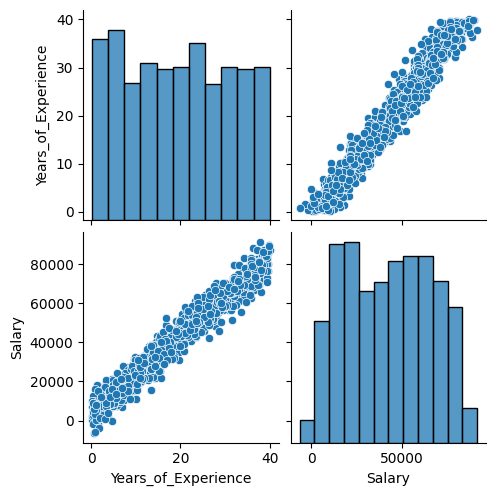

In [9]:
sns.pairplot(df)

In [10]:
X = df[["Years_of_Experience"]]
y = df["Salary"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

M

In [15]:
model.coef_[0] # Y = MX + B

np.float64(1978.0373263854233)

b

In [16]:
model.intercept_

np.float64(3948.761703649383)

In [17]:
# y = 1978.03 * X + 3948.76

In [18]:
y_pred = model.predict(X_test)

In [19]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

In [20]:
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {MAE:.2f}")
print(f"Mean Squared Error (MSE): {MSE:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f}")
print(f"R-squared Score (R²): {R2:.2f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 3602.37
Mean Squared Error (MSE): 21433993.90
Root Mean Squared Error (RMSE): 4629.69
R-squared Score (R²): 0.96


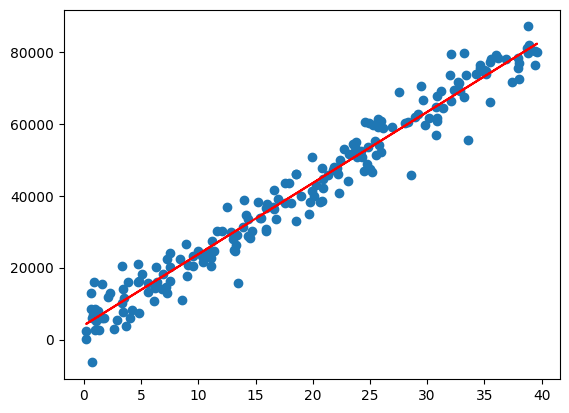

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')

In [22]:
import pickle

In [23]:
with open('salary_model.pkl', 'wb') as file:
  pickle.dump(model, file)

In [24]:
!pip install gradio

In [25]:
import gradio as gr

In [26]:
def predict_salary(years_of_experience):
  salary = model.predict([[years_of_experience]])[0]
  return f'Predicted Salary: ${round(salary, 2)}'

In [27]:
predict_salary(1)

'Predicted Salary: $5926.8'

In [32]:
model.predict([[32]])

array([67245.95614798])

In [28]:
iface = gr.Interface(
    fn=predict_salary,
    inputs=gr.Number(label='years of experience'),
    outputs=gr.Textbox(label='Predicted Salary'),
    title='Salary Predictor',
    description='Enter Years of Experience to predict salary',
)

In [29]:
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d493d258093f6ca412.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
